# Exploratory Data Analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

#pip install https://github.com/matplotlib/basemap/archive/master.zip

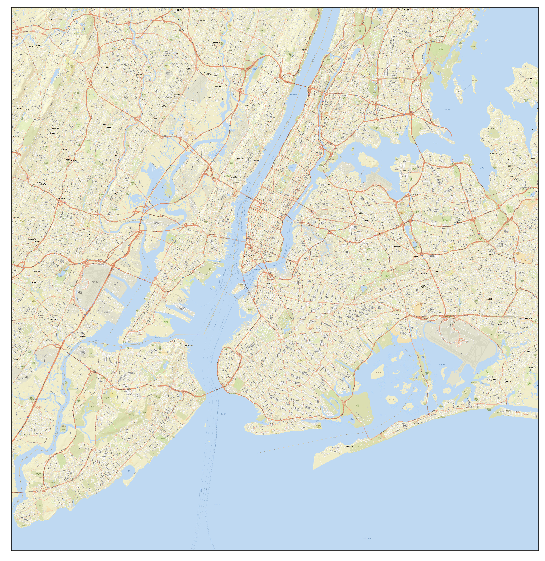

In [46]:
plt.figure(figsize=(10,10))

# https://boundingbox.klokantech.com/
# (latitude, longitude) == (row, col)
bbox_raw = [
    [-74.25909008,40.47739894], # lower-left
    [-73.70018092,40.47739894], # upper-left
    [-73.70018092,40.91617849], # upper-right
    [-74.25909008,40.91617849], # lower-right
    [-74.25909008,40.47739894]  # lower-left
]

min_lat = min([coord[1] for coord in bbox_raw])
min_lon = min([coord[0] for coord in bbox_raw])

max_lat = max([coord[1] for coord in bbox_raw])
max_lon = max([coord[0] for coord in bbox_raw])

center_lat = min_lat + max_lat / 2
center_lon = min_lon + max_lon / 2

ll_crnr = (min_lat, min_lon)
lr_crnr = (min_lat, max_lon)

ur_crnr = (max_lat, max_lon)
ul_crnr = (max_lat, min_lon)

shape_path = "../data/shapefiles/nyc_neighborhoods.shp"

expansion = -0.001

map = Basemap(
    llcrnrlon=min_lon - expansion,
    llcrnrlat=min_lat - expansion,
    urcrnrlon=max_lon + expansion,
    urcrnrlat=max_lat + expansion,
    epsg=2263
    #resolution='f', 
    #projection='mill', 
)

# map.drawmapboundary(fill_color='aqua')
# map.fillcontinents(color='#ddaa66',lake_color='aqua')
# map.drawcoastlines()
# map.drawstates()
# map.drawrivers()
map.arcgisimage(service='World_Street_Map', xpixels = 3000)

plt.show()

In [2]:
data_path = "../data/AB_NYC_2019.csv"
!wc {data_path}

  49081  384069 7077973 ../data/AB_NYC_2019.csv


In [6]:
bnb_df = pd.read_csv(
    data_path
)

print("Number of records in dataset: {}".format(bnb_df.shape[0]))

bnb_df.head()

Number of records in dataset: 48895


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
